In [1]:
import torch
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
from pathlib import Path

In [2]:
import pandas as pd

In [3]:

__COCO_IMG_PATH = Path( "data", "val_004_image")

__COCO_ANN_PATH = Path( "data", "annotate")

__TRAIN_PATH = {'root': __COCO_IMG_PATH.joinpath("train"),
                'annFile': __COCO_ANN_PATH.joinpath("train_annotate.csv")
                }
__VAL_PATH = {'root': __COCO_IMG_PATH.joinpath("val"),
              'annFile': __COCO_ANN_PATH.joinpath("val_annotate.csv")
              }


In [4]:

model= torch.load('results/2023-12-05_02-59-39/checkpoint_epoch_20.pth.tar')['model']



In [32]:
ann_Val = pd.read_csv(__VAL_PATH['annFile'])
ann_Val.head()

,license,file_name,coco_url,height,width,date_captured,flickr_url,image_id,id,caption
0,2,COCO_val2014_000000403013.jpg,http://mscoco.org/images/403013,450,301,2013-11-14 18:37:28,http://farm8.staticflickr.com/7369/8717355931_...,403013,124166,A narrow kitchen filled with appliances and co...
1,2,COCO_val2014_000000403013.jpg,http://mscoco.org/images/403013,450,301,2013-11-14 18:37:28,http://farm8.staticflickr.com/7369/8717355931_...,403013,173825,A galley kitchen with cabinets and appliances ...
2,2,COCO_val2014_000000403013.jpg,http://mscoco.org/images/403013,450,301,2013-11-14 18:37:28,http://farm8.staticflickr.com/7369/8717355931_...,403013,182303,A hallway leading into a white kitchen with ap...
3,2,COCO_val2014_000000403013.jpg,http://mscoco.org/images/403013,450,301,2013-11-14 18:37:28,http://farm8.staticflickr.com/7369/8717355931_...,403013,184703,"Doorway view of a kitchen with a sink, stove, ..."
4,2,COCO_val2014_000000403013.jpg,http://mscoco.org/images/403013,450,301,2013-11-14 18:37:28,http://farm8.staticflickr.com/7369/8717355931_...,403013,185720,The pantry door of the small kitchen is closed.


In [33]:
def show_and_tell(model, filename = None, beam_size=1):
    if filename is None:
        row = ann_Val.sample()
        filename = row['file_name'].item()
    rows = ann_Val.query(f"file_name == @filename")
    print("Caption: ", rows['caption'].tolist())
    p = __VAL_PATH['root'].joinpath(filename)
    filename = str(p)
    with torch.no_grad():
        img = Image.open(filename, 'r')
        model.eval()
        imshow(np.asarray(img))
        # captions = model.generate(img, beam_size=beam_size)
        captions = model.sample(img)
        s = []
        for w in captions:
            if w == 'EOS':
                break
            s.append(w)
        print("Predicted captions: ", ' '.join(s))

Caption:  ['there are several street signs on the same wood poles', 'A large sign on the side of a city street.', 'A construction sign on a street corner of a city.', 'A sign is at the crosswalk for a street improvement project.', 'A sign explain the meaning of the road work.']
Predicted captions:  a street sign with a clock on it


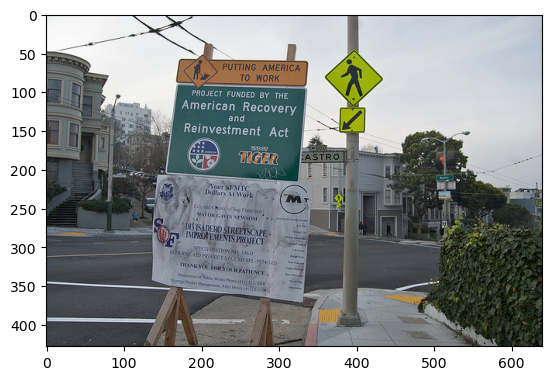

In [38]:
show_and_tell(model)

Caption:  ['A professional baseball player hits the ball. ', 'A baseball player and a catcher at home plate.', 'A batter and catcher during a baseball game with people watching.', 'A baseball player swinging a baseball bat at home plate.', 'A baseball player standing next to home plate.']
Predicted captions:  a baseball player swinging a bat at a baseball game


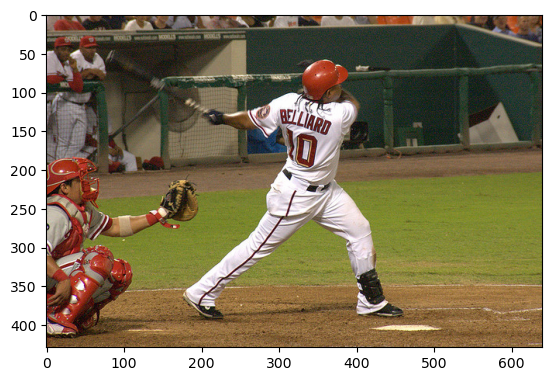

In [23]:
show_and_tell(model)

Caption:  ['A sexy young woman standing on a tennis court holding a tennis racquet.', 'A tennis player lunges to hit the ball. ', 'Woman sporting a braid while holding a tennis racket and focusing on the ball.', 'a tennis player swinging a tennis racket ', 'A tennis player is in a half split as she stretches to hit the ball.']
Predicted captions:  a man is playing tennis on a tennis court


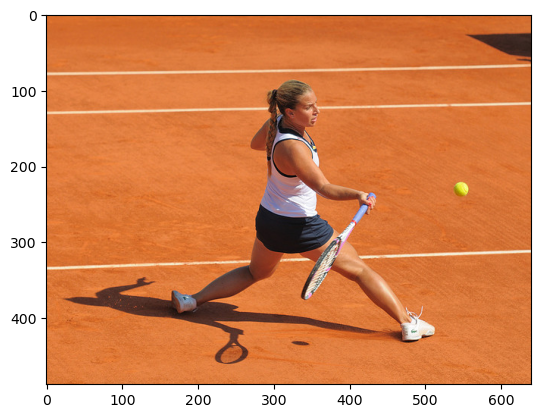

In [24]:
show_and_tell(model)

Caption:  ['There is a skateboarder at the top of a small ramp.', 'a person riding a skate board at a skate park', 'A young man on a skateboard performing a jump.', 'A man on a skateboard going up a ramp.', 'A man riding through the air on top of skateboard.']
Predicted captions:  a man is riding a skateboard down a street


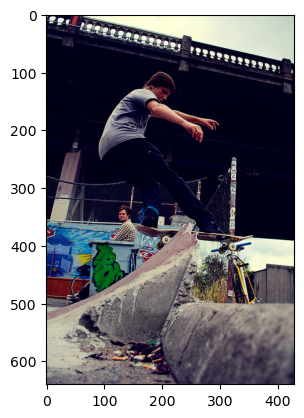

In [34]:
show_and_tell(model)